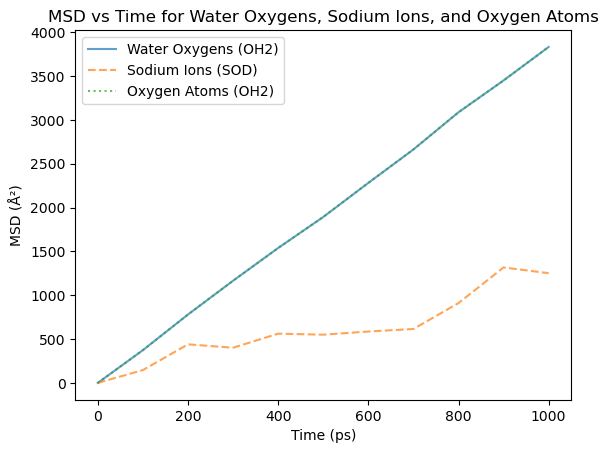

In [18]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the topology and trajectory files
u = mda.Universe("step5_5.gro", "unwrapped.xtc")

# Select atom groups: water oxygens (OH2), sodium ions (SOD), and oxygen atoms (OH2)
water_oxygens = u.select_atoms("resname TIP3 and name OH2")  # Water oxygen atoms
sodium_atoms = u.select_atoms("resname SOD")  # Sodium ions
oxygen_atoms = u.select_atoms("name OH2")  # All water oxygen atoms

# Confirm selection

def compute_msd(atomgroup, u):
    if len(atomgroup) == 0:
        print(f"No atoms selected: {atomgroup}")
        return np.array([])  # Return empty array if no atoms are selected
    
    msd = np.zeros(len(u.trajectory))
    initial_positions = atomgroup.positions.copy()
    
    for i, ts in enumerate(u.trajectory):
        current_positions = atomgroup.positions
        displacements = current_positions - initial_positions
        squared_displacements = np.sum(displacements ** 2, axis=1)
        msd[i] = np.mean(squared_displacements)
    
    return msd

# Compute MSD for Water Oxygens, Sodium ions, and Oxygen atoms
msd_water_oxygen = compute_msd(water_oxygens, u)
msd_sodium = compute_msd(sodium_atoms, u)
msd_oxygen = compute_msd(oxygen_atoms, u)



plt.figure()
plt.plot(time, msd_water_oxygen, label='Water Oxygens (OH2)', linestyle='-', alpha=0.7)
plt.plot(time, msd_sodium, label='Sodium Ions (SOD)', linestyle='--', alpha=0.7)
plt.plot(time, msd_oxygen, label='Oxygen Atoms (OH2)', linestyle=':', alpha=0.7)
plt.xlabel('Time (ps)')
plt.ylabel('MSD (Å²)')
plt.legend()
plt.title('MSD vs Time for Water Oxygens, Sodium Ions, and Oxygen Atoms')
plt.savefig('MSD_vs_Time.png')
plt.show()
